In [1]:
%matplotlib notebook

import numpy
import quantum_wavepacket.wavepacket as wavepacket
import quantum_wavepacket.periodic_boundary_condition_1D.pbc1d_params as pbc1d_params
import quantum_wavepacket.periodic_boundary_condition_1D.pbc1d_calc_wavefun as pbc1d_calc_wavefun
import quantum_wavepacket.graph_psi as graph_psi
import quantum_wavepacket.wavefun_calcs as wavefun_calcs

import matplotlib.pyplot as pyplot
import seaborn as sns
sns.set(color_codes=True)

In [45]:
my_params = pbc1d_params.Pbc1dParams(periodic_length=100.0, num_x=1000, duration=2000, num_t=1000)
print("my_params:  {}".format(my_params))

my_params:  Pbc1dParams periodic_length:  100.0  num_x:  1000  dx:  0.1  x[:3]:  [0.  0.1 0.2]
                duration:  2000.0  num_t:  1000  dt:  2.0  t[:3]:  [0. 2. 4.]


In [46]:
my_wavepacket = wavepacket.Wavepacket(state_indexes=numpy.array(range(1,27)))
# coefficients are a gaussian distribution centered around n=10
my_wavepacket.state_coefs = numpy.exp(-numpy.power(my_wavepacket.state_indexes - 13, 2) / 20.0)
my_wavepacket.normalize_state_coefs()
print(my_wavepacket)

Wavepacket state_indexes.shape:  (26,) state_indexes[:3]:  [1 2 3]  
            state_coefs.shape:  (26,)  state_coefs[:3]:  [0.00031535 0.00099593 0.00284603]


In [47]:
pyplot.figure("state_coefs")
pyplot.plot(my_wavepacket.state_indexes, my_wavepacket.state_coefs)
pyplot.ylabel("state_coef")
pyplot.xlabel("state_index")

<IPython.core.display.Javascript object>

Text(0.5, 0, 'state_index')

In [48]:
initial_psi = pbc1d_calc_wavefun.calc_in_position_space(my_wavepacket, my_params)
graph_psi.graph(initial_psi, my_params.x, "initial_psi")

initial_prob_dens = wavefun_calcs.calc_prob_dens(initial_psi)
pyplot.figure("initial_prob_dens")
pyplot.plot(my_params.x, numpy.real(initial_prob_dens))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
t_wavepacket = wavepacket.Wavepacket(state_indexes=my_wavepacket.state_indexes,
                                    state_coefs=my_wavepacket.state_coefs)
time_psi_list = []
time_prob_dens_list = []
for cur_t in my_params.t:
    psi_t = pbc1d_calc_wavefun.calc_time_dependent_state_coef(my_wavepacket, my_params.periodic_length, cur_t)

    t_wavepacket.state_coefs = my_wavepacket.state_coefs * psi_t

    psi = pbc1d_calc_wavefun.calc_in_position_space(t_wavepacket, my_params)
    time_psi_list.append(psi)

    prob_dens = wavefun_calcs.calc_prob_dens(psi)
    time_prob_dens_list.append(prob_dens)

<IPython.core.display.Javascript object>


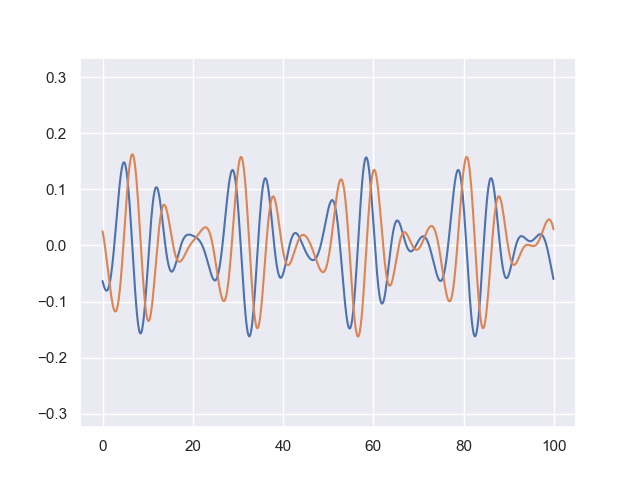

In [55]:
max_y = max([max(x) for x in time_psi_list])
min_y = min([min(x) for x in time_psi_list])

time_psi_split = [(numpy.real(x), numpy.imag(x)) for x in time_psi_list]

fig = pyplot.figure()
ax = fig.add_subplot(111)

for time_psi_real, time_psi_imag in time_psi_split:
    ax.clear()
    ax.plot(my_params.x, time_psi_real)
    ax.plot(my_params.x, time_psi_imag)
    pyplot.ylim((min_y, max_y))
    fig.canvas.draw()

<IPython.core.display.Javascript object>


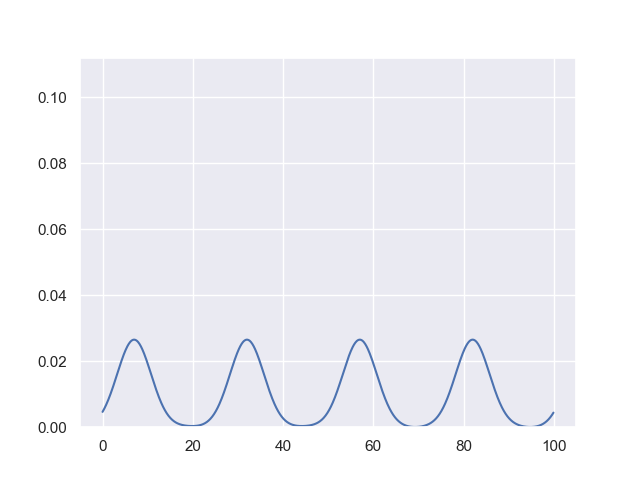

In [52]:
max_y = max([max(x) for x in time_prob_dens_list])
min_y = min([min(x) for x in time_prob_dens_list])

fig = pyplot.figure()
ax = fig.add_subplot(111)

for time_prob_dens in time_prob_dens_list[:]:
    ax.clear()
    ax.plot(my_params.x, time_prob_dens)
    pyplot.ylim((min_y, max_y))
    fig.canvas.draw()